## Лабораторна робота №6
* Тема: Розробка нейронних мереж для опрацювання природної мови.
* Мета: Ознайомитися з основами опрацювання природної мови (NLP) та великих мовних моделей (LLM), вивчити методи представлення тексту, класичні нейронні підходи (RNN, LSTM) та сучасні трансформерні архітектури (BERT, GPT, T5). Розглянути техніки переднавчання і донавчання мовних моделей, а також оцінку їхньої якості. Вивчити реальні застосування LLM та етичні аспекти їх використання.

##### Варіант №1
- Написати програму, яка розбиває текст на слова (токени) та видаляє всі стоп-слова.
- Використовувати бібліотеку nltk.
- Побудувати векторні представлення слів за допомогою моделі Word2Vec.
- Обчислити косинусну подібність між двома заданими словами.
- Використовуючи модель Word2Vec, знайти слова, які найбільше схожі на задане слово.
* Виконала студентка групи ОІ-21сп 
* Вишинська Наталія

### Імпорт необхідних бібліотек

In [33]:
import nltk
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import cosine_similarity
import itertools
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

### Завантаження необхідних ресурсів

In [2]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
filename = "text.txt"
with open(filename, "r", encoding="utf-8") as file:
    text = file.read()

print("Перші 500 символів завантаженого тексту:")
print(text[:500])

Перші 500 символів завантаженого тексту:
Why Machine Learning Strategy
Machine learning is the foundation of countless important applications, including web
search, email anti-spam, speech recognition, product recommendations, and more. I assume
that you or your team is working on a machine learning application, and that you want to
make rapid progress. This book will help you do so.
Example: Building a cat picture startup
Say you’re building a startup that will provide an endless stream of cat pictures to cat lovers.
You use a neural 


#### Токенізація тексту та видалення всіх стоп-слів за допомогою nltk
* Стоп-слова — це поширені слова (наприклад, "the", "is", "and"), які не несуть значущого смислу.

In [36]:
# Токенізація
tokens = word_tokenize(text.lower())

# Стоп-слова та символи
stop_words = set(stopwords.words("english"))

# Видалення стоп-слів і пунктуації
filtered_tokens = [word for word in tokens if word not in stop_words and word.isalpha()]

# Вивід результату
print("Кількість токенів до видалення:", len(tokens))
print("Кількість токенів після видалення:", len(filtered_tokens))
print("Всі токени після видалення:")
for token in filtered_tokens:
    print(f"- {token}")

Кількість токенів до видалення: 3347
Кількість токенів після видалення: 1492
Всі токени після видалення:
- machine
- learning
- strategy
- machine
- learning
- foundation
- countless
- important
- applications
- including
- web
- search
- email
- speech
- recognition
- product
- recommendations
- assume
- team
- working
- machine
- learning
- application
- want
- make
- rapid
- progress
- book
- help
- example
- building
- cat
- picture
- startup
- say
- building
- startup
- provide
- endless
- stream
- cat
- pictures
- cat
- lovers
- use
- neural
- network
- build
- computer
- vision
- system
- detecting
- cats
- pictures
- tragically
- learning
- algorithm
- accuracy
- yet
- good
- enough
- tremendous
- pressure
- improve
- cat
- detector
- team
- lot
- ideas
- get
- data
- collect
- pictures
- cats
- collect
- diverse
- training
- set
- example
- pictures
- cats
- unusual
- positions
- cats
- unusual
- coloration
- pictures
- shot
- variety
- camera
- settings
- train
- algorithm
- 

### Створення векторних представлень слів за допомогою моделі Word2Vec.

In [20]:
# Word2Vec очікує список списків (речення)
sentences = [filtered_tokens]  # або розбити по реченнях окремо

# Створення моделі Word2Vec
model = Word2Vec(sentences, vector_size=50, window=5, min_count=1, workers=4)

# Вивід вектора для слова
print("Вектор для слова 'learning':")
print(model.wv["learning"])

Вектор для слова 'learning':
[ 0.01612632 -0.01904615 -0.00073892  0.00615503 -0.00141152  0.01512262
  0.019672    0.01639503 -0.00440777  0.01466768 -0.01742948  0.00455786
 -0.00894299 -0.00963766  0.00555973  0.01154521  0.01672873 -0.0108548
  0.01212803  0.01332028 -0.00762419 -0.01632191  0.01298522  0.01175614
 -0.0002531  -0.01271052 -0.01434711 -0.00553211  0.00826346 -0.0075385
 -0.01807128  0.00809721  0.00849489 -0.01211932  0.00119613 -0.00280652
  0.00141541 -0.01960726  0.00600167 -0.01145285  0.00393268 -0.00300486
  0.00440211 -0.01601708 -0.00178015  0.00635292  0.0115529  -0.00632084
 -0.01789753  0.00949679]


### Обчислення косинусної подібність між двома заданими словами.

In [25]:
# Отримати унікальні слова з токенізованого тексту
unique_words = list(set(filtered_tokens))

# Створити всі можливі пари слів
word_pairs = list(itertools.combinations(unique_words, 2))

print("Косинусна подібність між послідовними парами слів:")
for i in range(len(filtered_tokens) - 1):
    w1 = filtered_tokens[i]
    w2 = filtered_tokens[i + 1]
    if w1 in model.wv and w2 in model.wv:
        v1 = model.wv[w1].reshape(1, -1)
        v2 = model.wv[w2].reshape(1, -1)
        sim = cosine_similarity(v1, v2)[0][0]
        print(f"{w1} та {w2}: {sim:.4f}")


Косинусна подібність між послідовними парами слів:
machine та learning: -0.0114
learning та strategy: -0.1500
strategy та machine: 0.1137
machine та learning: -0.0114
learning та foundation: 0.1179
foundation та countless: 0.0020
countless та important: 0.1921
important та applications: -0.0306
applications та including: 0.1092
including та web: -0.1913
web та search: -0.0438
search та email: 0.1872
email та speech: 0.1857
speech та recognition: -0.0093
recognition та product: 0.0248
product та recommendations: 0.0397
recommendations та assume: -0.0784
assume та team: -0.0492
team та working: -0.0453
working та machine: 0.1032
machine та learning: -0.0114
learning та application: -0.0515
application та want: -0.0419
want та make: 0.0136
make та rapid: -0.0069
rapid та progress: 0.0653
progress та book: -0.1057
book та help: 0.1419
help та example: 0.0266
example та building: 0.1228
building та cat: -0.3276
cat та picture: -0.1602
picture та startup: -0.1572
startup та say: 0.0961
say т

### Використання моделі Word2Vec, для знаходження слів, які найбільше схожі на задане слово.

In [27]:
# Задане слово
target_word = "team"

# Перевірка наявності слова в моделі
if target_word in model.wv:
    similar_words = model.wv.most_similar(target_word, topn=5)
    print(f"Найбільш схожі слова на '{target_word}':")
    for word, similarity in similar_words:
        print(f"- {word} (подібність: {similarity:.4f})")
else:
    print(f"Слова '{target_word}' немає у словнику моделі.")


Найбільш схожі слова на 'team':
- would (подібність: 0.4027)
- rapid (подібність: 0.3889)
- expected (подібність: 0.3577)
- useful (подібність: 0.3197)
- endless (подібність: 0.3181)


### Візуалізація ембедінгів через t-SNE

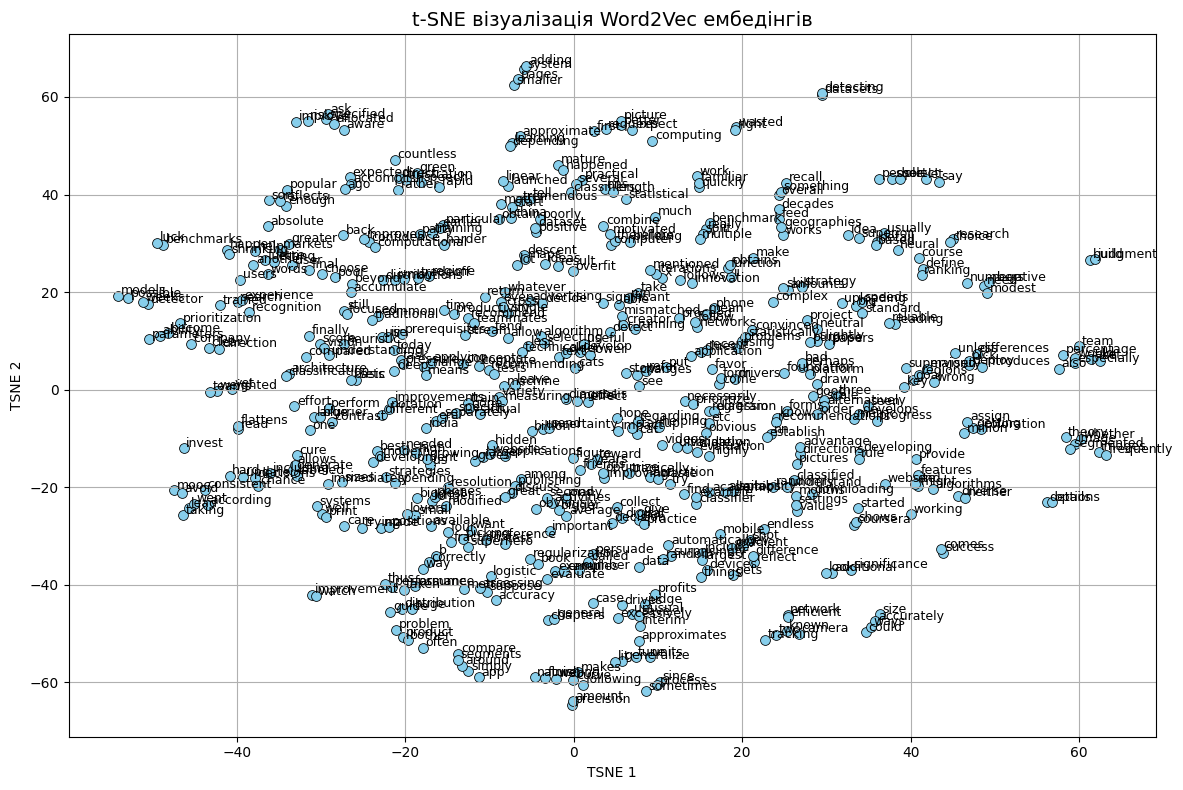

In [34]:
# Отримуємо всі слова з моделі
words = list(model.wv.index_to_key)
vectors = np.array([model.wv[word] for word in words])

# Зменшення розмірності до 2D за допомогою t-SNE
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
reduced = tsne.fit_transform(vectors)

# Побудова графіка
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=reduced[:, 0], y=reduced[:, 1], s=50, color="skyblue", edgecolor="black"
)

# Додаємо підписи до точок зі зсувом
for i, word in enumerate(words):
    plt.text(reduced[i, 0] + 0.3, reduced[i, 1] + 0.3, word, fontsize=9)

plt.title("t-SNE візуалізація Word2Vec ембедінгів", fontsize=14)
plt.xlabel("TSNE 1")
plt.ylabel("TSNE 2")
plt.grid(True)
plt.tight_layout()
plt.show()

### Висновок

У цій лабораторній роботі було реалізовано семантичний аналіз тексту з використанням класичної моделі **Word2Vec**. Основні результати:

-  Початкова кількість токенів у тексті: **3347**
-  Після видалення стоп-слів залишилося: **1492 токени**
-  Створено векторні представлення слів, що дозволяє моделі "розуміти" семантичні зв’язки між ними.
-  Обчислено **косинусну подібність** між словами попарно, щоб оцінити їх схожість.
-  Найбільш схожі слова до **`team`** за даними моделі:
  - `would` — **0.4027**
  - `rapid` — **0.3889**
  - `expected` — **0.3577**
  - `useful` — **0.3197**
  - `endless` — **0.3181**

- За допомогою **t-SNE** виконано візуалізацію векторів у 2D-просторі, що дозволило наочно побачити групування семантично близьких слів.

>  Робота показала, що навіть базова Word2Vec-модель на обмеженому наборі даних здатна успішно виявляти смислові зв’язки між словами. Це відкриває перспективи для подальшого використання в завданнях класифікації, пошуку схожих слів, побудови чат-ботів тощо.
